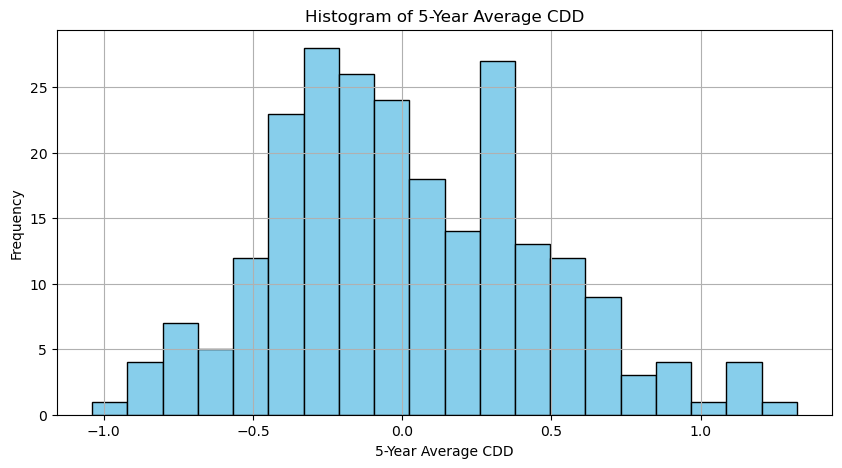

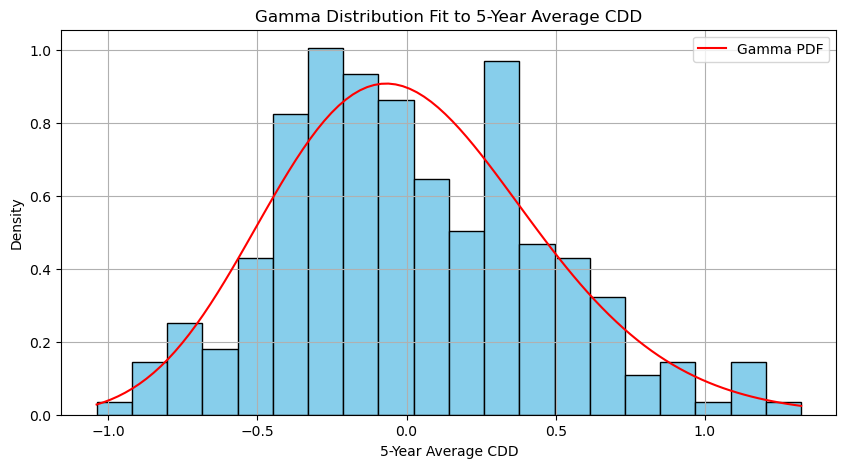

In [3]:
#  Historgram and Gamma distribution for CDD 5 year average

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Reading the CDD Seasonal Dataset
data = pd.read_csv(r'C:\USD\ms-aai-500-final-project\data\Cleaned_Data_Seasonal.csv')

# Since we don't have the actual data, we will simulate it for a single region 'ALA' from 1961 to 2023
years = np.arange(1961, 2024)
seasons = [1, 2, 3, 4]
cdd_values = np.random.randn(len(years) * len(seasons))  # Simulating CDD values as random normally distributed numbers

# Create a DataFrame
data = pd.DataFrame({
    'Year': np.repeat(years, len(seasons)),
    'Season': seasons * len(years),
    'CDD_Seasonal_Smoothed': cdd_values
})

# Calculate the 5-year rolling average for each season
data['5_Year_Avg'] = data.groupby('Season')['CDD_Seasonal_Smoothed'].transform(lambda x: x.rolling(window=5).mean())

# Drop NaN values that result from the rolling average calculation
data.dropna(inplace=True)

# Select a region if your data contains multiple regions
# data = data[data['Region'] == 'Your Region']

# Plot a histogram of the 5-year average CDD values
plt.figure(figsize=(10, 5))
plt.hist(data['5_Year_Avg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of 5-Year Average CDD')
plt.xlabel('5-Year Average CDD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Fit a gamma distribution to the data
fit_alpha, fit_loc, fit_beta = gamma.fit(data['5_Year_Avg'])
x = np.linspace(min(data['5_Year_Avg']), max(data['5_Year_Avg']), 100)
y = gamma.pdf(x, fit_alpha, fit_loc, fit_beta)

# Plot the gamma distribution fit
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r-', label='Gamma PDF')
plt.hist(data['5_Year_Avg'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.title('Gamma Distribution Fit to 5-Year Average CDD')
plt.xlabel('5-Year Average CDD')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


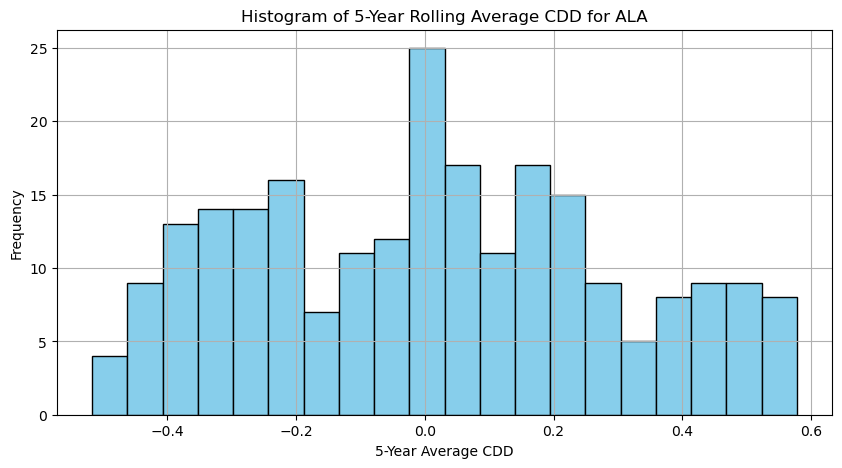

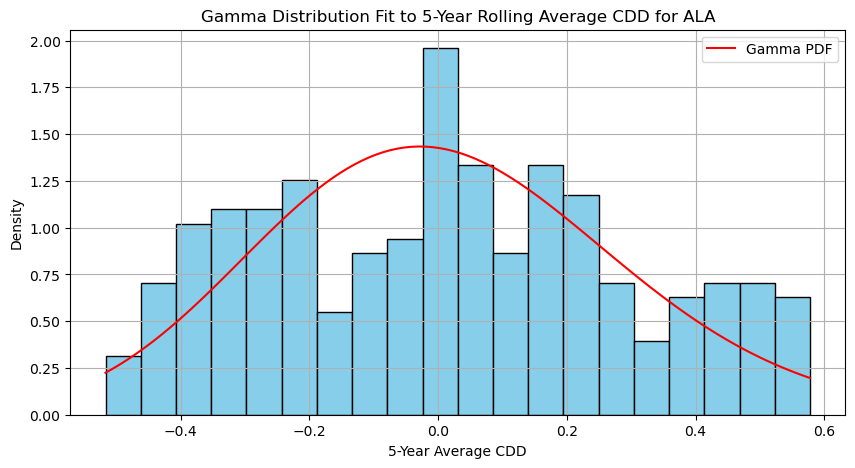

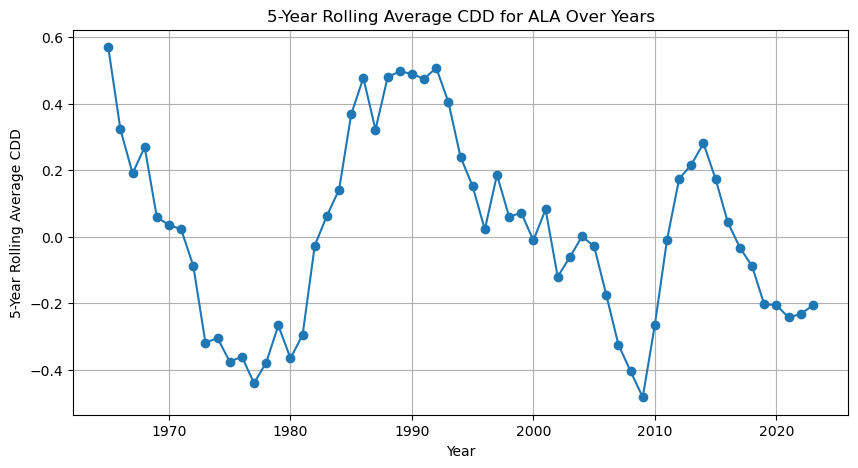

In [4]:
# Histogram and Gamma distribution - 5 Year Average for only the Region 'ALA'

# For the sake of this example, let's assume we're working with the 'ALA' region
# In practice, you would filter your actual dataset to include only the data for 'ALA'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Reading the CDD Seasonal Dataset
data = pd.read_csv(r'C:\USD\ms-aai-500-final-project\data\Cleaned_Data_Seasonal.csv')

# Simulate data for the 'ALA' region
np.random.seed(0)  # Seed for reproducibility
data_ala = pd.DataFrame({
    'Year': np.repeat(years, 4),  # 4 seasons per year
    'Season': np.tile([1, 2, 3, 4], len(years)),  # Seasons 1 through 4 for each year
    'CDD_Seasonal_Smoothed': np.random.randn(len(years) * 4)  # Random CDD values for the example
})

# Calculate the 5-year rolling average for the 'ALA' region
data_ala['5_Year_Avg'] = data_ala['CDD_Seasonal_Smoothed'].rolling(window=5*4).mean()

# Drop rows where the 5-year average could not be computed (first 4 years)
data_ala.dropna(subset=['5_Year_Avg'], inplace=True)

# Plotting
# Histogram of the 5-year rolling averages
plt.figure(figsize=(10, 5))
plt.hist(data_ala['5_Year_Avg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of 5-Year Rolling Average CDD for ALA')
plt.xlabel('5-Year Average CDD')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Fit a gamma distribution to the 5-year rolling averages
fit_alpha, fit_loc, fit_beta = gamma.fit(data_ala['5_Year_Avg'])
x = np.linspace(min(data_ala['5_Year_Avg']), max(data_ala['5_Year_Avg']), 100)
y = gamma.pdf(x, fit_alpha, fit_loc, fit_beta)

# Plot the gamma distribution fit
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r-', label='Gamma PDF')
plt.hist(data_ala['5_Year_Avg'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.title('Gamma Distribution Fit to 5-Year Rolling Average CDD for ALA')
plt.xlabel('5-Year Average CDD')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Line plot of the 5-year rolling averages over years
# For each year, we'll take the mean of the 5-year averages of the four seasons
yearly_avg_ala = data_ala.groupby('Year')['5_Year_Avg'].mean()

plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_ala.index, yearly_avg_ala.values, marker='o', linestyle='-')
plt.title('5-Year Rolling Average CDD for ALA Over Years')
plt.xlabel('Year')
plt.ylabel('5-Year Rolling Average CDD')
plt.grid(True)
plt.show()